In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Preform Basic Data Cleaning

In [2]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [3]:
#checking for null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Description of dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#detailed look at what is actually missing in data

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [6]:
#Merged test dataset with gender to have is people survived or not.
test_merged_df = test_df.merge(gender_df, on='PassengerId')

Dropped Columns:

In [7]:
#Non needed columns
train_df = train_df.drop(['Ticket'], axis=1)
test_merged_df = test_merged_df.drop(['Ticket'], axis=1)

In [8]:
train_df = train_df.drop(['Cabin'], axis=1)
test_merged_df = test_merged_df.drop(['Cabin'], axis=1)

In [9]:
train_df = train_df.drop(['Name'], axis=1)
test_merged_df = test_merged_df.drop(['Name'], axis=1)

In [10]:
#dropping na from names
train_df = train_df[train_df['Age'].notna()]
test_merged_df = test_merged_df[test_df['Age'].notna()]

In [11]:
# #Making ports numeric
# ports = {"S": 0, "C": 1, "Q": 2}
# data = [train_df, test_merged_df]

# for dataset in data:
#     dataset['Embarked'] = dataset['Embarked'].map(ports)

In [12]:
# #Embarked feature has only 2 missing values, filled in with most common
# common_value = 'S'
# data = [train_df, test_merged_df]

# for dataset in data:
#     dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [13]:
train_df = train_df.drop(['Embarked'], axis=1)
test_merged_df = test_merged_df.drop(['Embarked'], axis=1)

In [14]:
#Checking dataframes after dropping columns and merging

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 50.2+ KB


In [16]:
test_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Pclass       332 non-null    int64  
 2   Sex          332 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        332 non-null    int64  
 5   Parch        332 non-null    int64  
 6   Fare         331 non-null    float64
 7   Survived     332 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 23.3+ KB


In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [18]:
test_merged_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3,male,34.5,0,0,7.8292,0
1,893,3,female,47.0,1,0,7.0000,1
2,894,2,male,62.0,0,0,9.6875,0
3,895,3,male,27.0,0,0,8.6625,0
4,896,3,female,22.0,1,1,12.2875,1


In [19]:
#changed the fare na to 0 and changed type to interget from a float64
data = [train_df, test_merged_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [20]:
data

[     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  Fare
 0              1         0       3    male  22.0      1      0     7
 1              2         1       1  female  38.0      1      0    71
 2              3         1       3  female  26.0      0      0     7
 3              4         1       1  female  35.0      1      0    53
 4              5         0       3    male  35.0      0      0     8
 ..           ...       ...     ...     ...   ...    ...    ...   ...
 885          886         0       3  female  39.0      0      5    29
 886          887         0       2    male  27.0      0      0    13
 887          888         1       1  female  19.0      0      0    30
 889          890         1       1    male  26.0      0      0    30
 890          891         0       3    male  32.0      0      0     7
 
 [714 rows x 8 columns],
      PassengerId  Pclass     Sex   Age  SibSp  Parch  Fare  Survived
 0            892       3    male  34.5      0      0     7    

In [21]:
#Made genders bianary
genders = {"male": 0, "female": 1}
data = [train_df, test_merged_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [22]:
X_train = train_df.drop(["PassengerId", "Survived"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_merged_df.drop(["PassengerId", "Survived"], axis=1).copy()
Y_test = test_merged_df["Survived"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((714, 6), (714,), (332, 6), (332,))

In [23]:
feature_names = X_test.columns
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7
1,3,1,47.0,1,0,7
2,2,0,62.0,0,0,9
3,3,0,27.0,0,0,8
4,3,1,22.0,1,1,12


In [24]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# Y_scaler = StandardScaler().fit(Y_train)

In [25]:
# X_train_scaled = X_scaler.transform(X_train)
# Y_train_scaled = Y_scaler.transform(Y_train)
# X_test_scaled = X_scaler.transform(X_test)
# Y_test_scaled = Y_scaler.transform(Y_test)

# Model Building and Training

Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [27]:
prediction = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
logistic_regression = accuracy_score(Y_test,prediction)*100
logistic_regression

91.26506024096386

Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
ran_forest = random_forest.score(X_train, Y_train)*100

In [30]:
ran_forest

96.35854341736695

In [31]:
importances = random_forest.feature_importances_
importances

array([0.10678045, 0.26893767, 0.32642338, 0.04890166, 0.03788459,
       0.21107224])

In [32]:
# We can sort the features by their importance
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.32642338414125227, 'Age'),
 (0.2689376726283543, 'Sex'),
 (0.21107224435602526, 'Fare'),
 (0.10678045449961773, 'Pclass'),
 (0.04890165857628459, 'SibSp'),
 (0.037884585798465736, 'Parch')]

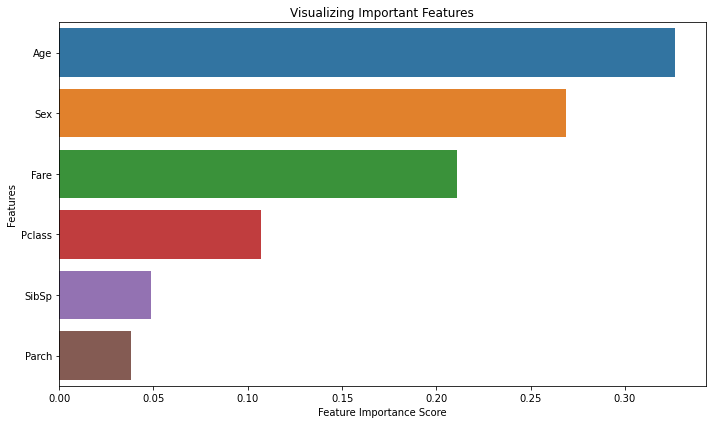

In [33]:
import seaborn as sns
feature_imp = pd.Series(random_forest.feature_importances_, index=feature_names).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Support Vector Machine Linear Classifier

In [ ]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, Y_train)
predictions = SVC.predict(X_test)

In [ ]:
 # Calculate classification report
from sklearn.metrics import accuracy_score
SVCAC = accuracy_score(Y_test,predictions)*100
SVCAC

K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_score = knn.score(X_train, Y_train)
    test_score = knn.score(X_test, Y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
knn = knn.score(X_test, Y_test)*100
knn

Decision Tree Model

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
prediction = decision_tree.predict(X_test)

In [ ]:
decision_tree = accuracy_score(Y_test,prediction)*100
decision_tree

In [ ]:
results = pd.DataFrame({
    "Model" : ["Logistic Regression", "Random Forest", "Support Vector Machine", "K Nearest Neighbors", "Decision Tree"],
    "Score" : [logistic_regression, ran_forest, SVCAC, knn, decision_tree]})

results_df = results.sort_values(by = "Score", ascending = False)
results_df = results_df.set_index("Model")
results_df


# Random Forest Predictions

In [ ]:
### Prediction person data (Pclass = 1, 2, or 3)
Pclass = 3
Age = 22
SibSp = 1
Sex = 0
Parch = 0
Fare = 7


new_person = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare]])
new_person

In [ ]:
Pclass = 3
Age = 45
SibSp = 1
Parch = 2
Fare = 20
Sex = 0
new_person2 = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare]])
new_person

In [ ]:
# Predict whether or not the person survives
rf_predictions_1 = random_forest.predict(new_person)
if predictions_1 == 0:
    print(f"This person would probably perish on the Titanic")
else:
    print(f"This person would probably survive on the Titanic")

In [ ]:
print(predictions_1)

In [ ]:
# Predict whether or not the person survives
rf_predictions_2 = random_forest.predict(new_person2)
if predictions_2 == 0:
    print(f"This person would probably perish on the Titanic")
else:
    print(f"This person would probably survive on the Titanic")

In [ ]:
print(predictions_2)